In [1]:
import numpy as np

# 假设a是一个4x3的NumPy数组，b是一个长度为3的布尔值数组
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

b = np.array([True, False, True])  # 假设布尔值数组b表示要保留的列

# 根据布尔值数组b选择保留的列
selected_columns = a[:, b]

print("选择的列：")
print(selected_columns)

选择的列：
[[ 1  3]
 [ 4  6]
 [ 7  9]
 [10 12]]


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 生成样本数据
# 假设有5个特征，最后一个特征为标签（1表示好转，0表示未好转）

X = np.random.randn(100, 100)
y = np.random.randint(0, 2, 100)
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 特征选择：t检验
# from scipy.stats import ttest_ind
# t_values, p_values = ttest_ind(X_train[y_train==0], X_train[y_train==1], axis=0)
# selected_features = np.where(p_values < 0.05)[0]
# X_train_selected = X_train[:, selected_features]
# X_test_selected = X_test[:, selected_features]



# 线性判别分析（LDA）降维
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# 使用决策树模型进行分类
clf = DecisionTreeClassifier()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率：", accuracy)

模型准确率： 0.23333333333333334


In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# 生成示例数据集
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 初始化LassoCV模型
lasso_cv = LassoCV(cv=5)  # cv表示交叉验证的折数

# 使用SelectFromModel进行特征选择
selector = SelectFromModel(lasso_cv)

# 拟合并转换数据
X_train_selected = selector.fit_transform(X_train, y_train)

# 输出选择的特征
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

# 在测试集上评估模型
X_test_selected = selector.transform(X_test)
lasso_cv.fit(X_train_selected, y_train)
score = lasso_cv.score(X_test_selected, y_test)
print("Test score:", score)

Selected features: [0 1 2 3 4 5 7 8 9]
Test score: 0.999993069808881


In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# 生成示例数据集
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化LassoCV模型
lasso_cv = LassoCV(cv=5)  # cv表示交叉验证的折数

# 使用SelectFromModel进行特征选择
selector = SelectFromModel(lasso_cv)

# 拟合并转换数据
X_train_selected = selector.fit_transform(X_train, y_train)

# 输出选择的特征
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

# 在测试集上评估模型
X_test_selected = selector.transform(X_test)
lasso_cv.fit(X_train_selected, y_train)
score = lasso_cv.score(X_test_selected, y_test)
print("Test score:", score)


Selected features: [0 1 2 3 4 5 6 7 8 9]
Test score: 0.9999970340861294


In [7]:
import pandas as pd

# 创建一个示例 DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9],
        # 添加示例数据以至少包含 50 列
        **{f'Column_{i}': [i * j for j in range(1, 4)] for i in range(1, 50)}}
df = pd.DataFrame(data)
df


,A,B,C,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,...,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49
0,1,4,7,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
1,2,5,8,2,4,6,8,10,12,14,...,80,82,84,86,88,90,92,94,96,98
2,3,6,9,3,6,9,12,15,18,21,...,120,123,126,129,132,135,138,141,144,147


In [8]:
# 通过列的索引数组选择多列
column_indices = [1, 3, 4, 20, 31, 36]  # 要选择的列的索引数组
selected_columns = df.iloc[:, column_indices]

print(selected_columns)

   B  Column_1  Column_2  Column_18  Column_29  Column_34
0  4         1         2         18         29         34
1  5         2         4         36         58         68
2  6         3         6         54         87        102


In [3]:
import radiomics
import radiomics.featureextractor as FEE
import os
import csv
import pandas as pd

tree1 = r'G:\img'
tree2 = r'G:\voi'
tree3 = r'G:\parameter.yaml'
tree4 = r'results.csv'

extractor = FEE.RadiomicsFeatureExtractor(tree3)
namelist = []
valuelist = []
result = []
for root, dirs, files in os.walk(tree1):
    for name in files:
        result = (extractor.execute(os.path.join(tree1, name), os.path.join(tree2, name)))
        valuelist.append(result.values())
        namelist.append(name)
with open("./csv.csv",'w',newline='') as t:
    writer = csv.writer(t)
    writer.writerow(result.keys())
    writer.writerows(valuelist)
csv = pd.read_csv("./csv.csv")
csv.insert(0, 'Name', namelist)

csv.to_csv(tree4, index=False)


OSError: Parameter file G:\parameter.yaml does not exist.

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# 假设你有一个特征矩阵 X 和对应的类别标签 y
X = np.array([[0.5, 1.2, 0.8],
              [1.0, 2.0, 1.5],
              [0.2, 0.6, 0.9],
              [2.0, 2.5, 1.8]])
y = np.array([0, 1, 0, 1])

# 创建并拟合LDA模型
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# 获取特征系数
feature_coefficients = lda.coef_

# 输出特征系数
print("Feature coefficients:", feature_coefficients)

# 根据特征系数选择特征
selected_features = np.argsort(np.abs(feature_coefficients))[0]
print("Selected features:", selected_features)

Feature coefficients: [[ 3.13576434  0.1650597  17.04457114]]
Selected features: [1 0 2]


In [5]:
strs = ['asdff-235v_vdfb','--bdb-b_dv','dv_va-v']

for col in strs:
    _col = col.replace('-','')
    new_col = _col.replace('_','')
    print(new_col)

print(strs)

asdff235vvdfb
bdbbdv
dvvav
['asdff-235v_vdfb', '--bdb-b_dv', 'dv_va-v']


In [9]:
strs = ['asdff-235v_vdfb','--bdb-b_dv','dv_va-v']

# 使用列表推导式遍历字符串数组，将其中每个字符串中的所有'a'替换成'b'
_str_array = [s.replace('-', '') for s in strs]
new_str_array = [s.replace('_', '') for s in _str_array]

print(new_str_array)

['asdff235vvdfb', 'bdbbdv', 'dvvav']


/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  func(*args, **kwargs)
/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32454 (\N{CJK UNIFIED IDEOGRAPH-7EC6}) missing from current font.
  func(*args, **kwargs)
/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32990 (\N{CJK UNIFIED IDEOGRAPH-80DE}) missing from current font.
  func(*args, **kwargs)
/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32954 (\N{CJK UNIFIED IDEOGRAPH-80BA}) missing from current font.
  func(*args, **kwargs)
/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30284 (\N{CJK UNIFIED IDEOGRAPH-764C}) missing from current font.
  func(*args, **kwargs)
/root/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3875

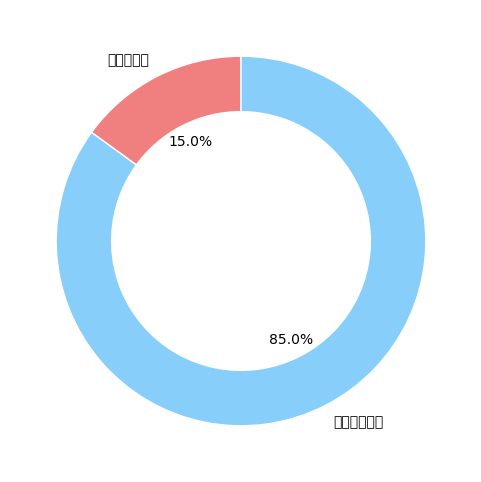

In [2]:
import matplotlib.pyplot as plt  
  
# 数据  
labels_outer = ['小细胞肺癌', '非小细胞肺癌']  
sizes_outer = [15, 85]  
  
labels_inner = ['发现时晚期', '发现时非晚期']  
sizes_inner = [30, 70]  # 这里的百分比是基于非小细胞肺癌的85%  
  
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))  
  
# 外层饼图  
outer_colors = ['lightcoral', 'lightskyblue']  
outer_wedgeprops = {'width': 0.3, 'edgecolor': 'w'}  
ax.pie(sizes_outer, labels=labels_outer, colors=outer_colors, autopct='%1.1f%%',  
       startangle=90, wedgeprops=outer_wedgeprops)  
  
# 计算内层饼图的中心位置（基于非小细胞肺癌的扇区）  
center = (0, 0)  
percentage = 0.85  # 非小细胞肺癌的百分比  
angle = (sizes_outer[1] / 100) * 360  # 非小细胞肺癌的扇区角度  
  
# 根据角度调整中心位置，以便内层饼图位于非